#CLASSIFICATION
#importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data=data.dropna()

In [ ]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df=data[['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']]
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
5,81.0,0,0,186.21,29.0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['gender'] = le.fit_transform(data['gender'])
df['ever_married'] = le.fit_transform(data['ever_married'])
df['work_type'] = le.fit_transform(data['work_type'])
df['Residence_type'] = le.fit_transform(data['Residence_type'])
df['smoking_status'] = le.fit_transform(data['smoking_status'])

<ipython-input-8-fdf3d41e02f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = le.fit_transform(data['gender'])
<ipython-input-8-fdf3d41e02f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ever_married'] = le.fit_transform(data['ever_married'])
<ipython-input-8-fdf3d41e02f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [ ]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,36.6,1,1,1,2,1,1
2,80.0,0,1,105.92,32.5,1,1,1,2,0,2
3,49.0,0,0,171.23,34.4,1,0,1,2,1,3
4,79.0,1,0,174.12,24.0,1,0,1,3,0,2
5,81.0,0,0,186.21,29.0,1,1,1,2,1,1


In [ ]:
data.shape

(4909, 12)

In [ ]:
df.shape

(4909, 11)

In [ ]:
x = df.drop('stroke',axis=1)
y = df['stroke']

In [ ]:
x.shape

(4909, 10)

In [ ]:
y.shape

(4909,)

Text(0.5, 1.0, 'COUNT PLOT')

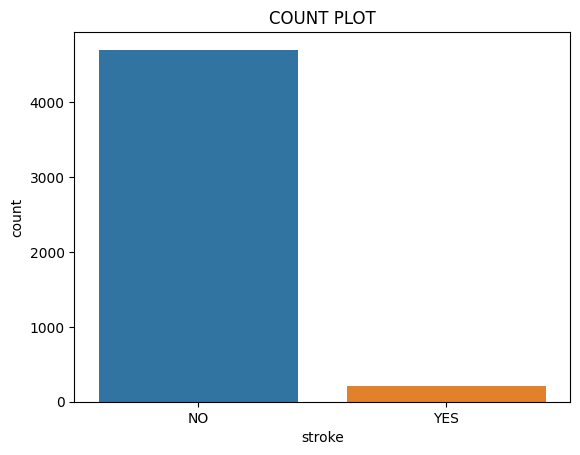

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df,x='stroke')
plt.xticks([0,1],['NO','YES'])
plt.title('COUNT PLOT')

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test= tts(x,y,test_size=0.2)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
ann = tf.keras.Sequential()
ann.add(Dense(units=25, activation='relu'))
ann.add(Dense(units=25,activation='relu'))
ann.add(Dense(units=1,activation='sigmoid'))
ann.compile('adam','binary_crossentropy',metrics=['accuracy'])

In [ ]:
result = ann.fit(x_train,y_train,epochs=10)

Epoch 1/10
123/123 [==============================] - 4s 8ms/step - loss: 1.5066 - accuracy: 0.8630
Epoch 2/10
123/123 [==============================] - 1s 7ms/step - loss: 0.2255 - accuracy: 0.9572
Epoch 3/10
123/123 [==============================] - 1s 7ms/step - loss: 0.1788 - accuracy: 0.9575
Epoch 4/10
123/123 [==============================] - 1s 5ms/step - loss: 0.1740 - accuracy: 0.9575
Epoch 5/10
123/123 [==============================] - 0s 4ms/step - loss: 0.1833 - accuracy: 0.9559
Epoch 6/10
123/123 [==============================] - 1s 5ms/step - loss: 0.1701 - accuracy: 0.9575
Epoch 7/10
123/123 [==============================] - 0s 4ms/step - loss: 0.1640 - accuracy: 0.9577
Epoch 8/10
123/123 [==============================] - 1s 4ms/step - loss: 0.1706 - accuracy: 0.9575
Epoch 9/10
123/123 [==============================] - 1s 10ms/step - loss: 0.1646 - accuracy: 0.9575
Epoch 10/10
123/123 [==============================] - 1s 7ms/step - loss: 0.1647 - accuracy: 0.958

In [ ]:
y_pred=[]
for i in ann.predict(x_test):
  if i>0.5:
    y_pred.append(1)
  if i<0.5:
    y_pred.append(0)

31/31 [==============================] - 1s 4ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[935,   4],
       [ 43,   0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9521384928716904

#Regression

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/CarPrice_Assignment (1).csv')
df

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
x = df.drop(['price'],axis=1)

In [ ]:
y = df.price

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
x_train.shape

(143, 198)

In [ ]:
from keras import backend as k
def r2(y_true,y_pred):
  ss_res = k.sum(k.square(y_true-y_pred))
  ss_tot = k.sum(k.square(y_true-k.mean(y_true)))
  return (1-ss_res/(ss_tot))

In [ ]:
model = Sequential()
model.add(Dense(400,activation='relu',input_dim=198))
model.add(Dense(240,activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='Adam',loss='mean_absolute_error',metrics=[r2])

In [ ]:
hist = model.fit(x_train,y_train,epochs=150, batch_size=5, validation_split=0.3)

Epoch 1/150
20/20 [==============================] - 0s 9ms/step - loss: 4075.1326 - r2: 0.0898 - val_loss: 4869.2329 - val_r2: 0.0702
Epoch 2/150
20/20 [==============================] - 0s 6ms/step - loss: 3989.0706 - r2: 0.1232 - val_loss: 4569.7764 - val_r2: 0.2225
Epoch 3/150
20/20 [==============================] - 0s 7ms/step - loss: 3695.4521 - r2: 0.0543 - val_loss: 4346.8706 - val_r2: 0.2907
Epoch 4/150
20/20 [==============================] - 0s 8ms/step - loss: 3556.3181 - r2: 0.1440 - val_loss: 4462.3496 - val_r2: 0.0977
Epoch 5/150
20/20 [==============================] - 0s 7ms/step - loss: 3318.1882 - r2: -0.1772 - val_loss: 3852.7126 - val_r2: 0.4032
Epoch 6/150
20/20 [==============================] - 0s 8ms/step - loss: 3098.6538 - r2: 0.4339 - val_loss: 5018.8335 - val_r2: -0.1691
Epoch 7/150
20/20 [==============================] - 0s 7ms/step - loss: 3042.0344 - r2: 0.5101 - val_loss: 3596.3027 - val_r2: 0.2993
Epoch 8/150
20/20 [==============================] - 

<Axes: xlabel='index'>

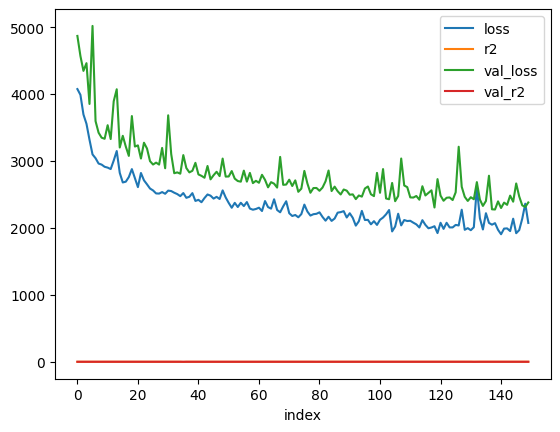

In [ ]:
pd.DataFrame(model.history.history).reset_index().plot('index',kind='line')

<Axes: xlabel='index'>

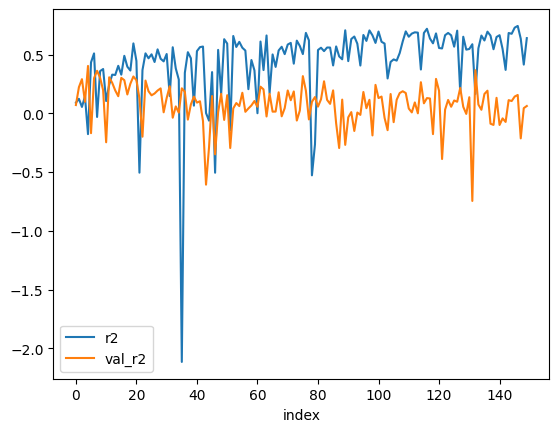

In [ ]:
pd.DataFrame(model.history.history)[['r2','val_r2']].reset_index().plot('index', kind='line')

In [ ]:
data = pd.DataFrame(hist.history)
data.loc[data['r2'].idxmax()]

loss        1968.135498
r2             0.743867
val_loss    2470.140381
val_r2         0.156055
Name: 146, dtype: float64